In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [4]:
df.RainTomorrow.isna().sum()

3267

In [5]:
df.RainToday.isna().sum()

3261

In [6]:
# the target column has null values 
# "assumption" : RainToday has a high influence on RainTomorrow , so i will drop 
# rows where either of the two are missing 



df.dropna(subset=['RainToday','RainTomorrow'],inplace = True)

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'



In [8]:
 px.histogram(df,
            x='Location',
            title='Location vs Rainy Days',
            color='RainToday')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [9]:
px.histogram(df,
            x='Temp3pm',
            color='RainTomorrow',
            title='Temp at 3pm vs Rain on next day')


# low temp at 3pm has rains

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [10]:
px.histogram(df,
            x='RainTomorrow',
            color='RainToday',
            title='RainTomorrow vs rain today')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [11]:
px.scatter(df.sample(2000),
          x='MinTemp',
          y='MaxTemp',
          color='RainToday',
          title='Min Temp vs Max Temp')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [12]:
px.scatter(df.sample(2000),
          x='Temp3pm',
          y='Humidity3pm',
          color='RainToday',
          title= 'Temp Vs Humidity')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [13]:
px.histogram(df.sample(2000),
          x='Cloud9am',
#           y='Cloud3pm',
          color='RainToday',
          title='Clouds vs Raintoday')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [14]:
px.histogram(df.sample(2000),
#           x='Cloud9am',
          x='Cloud3pm',
          color='RainToday',
          title='Clouds vs Raintoday')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [15]:
from sklearn.model_selection import train_test_split


In [16]:
train_val_df,test_df = train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

Text(0.5, 1.0, 'No of rows per year')

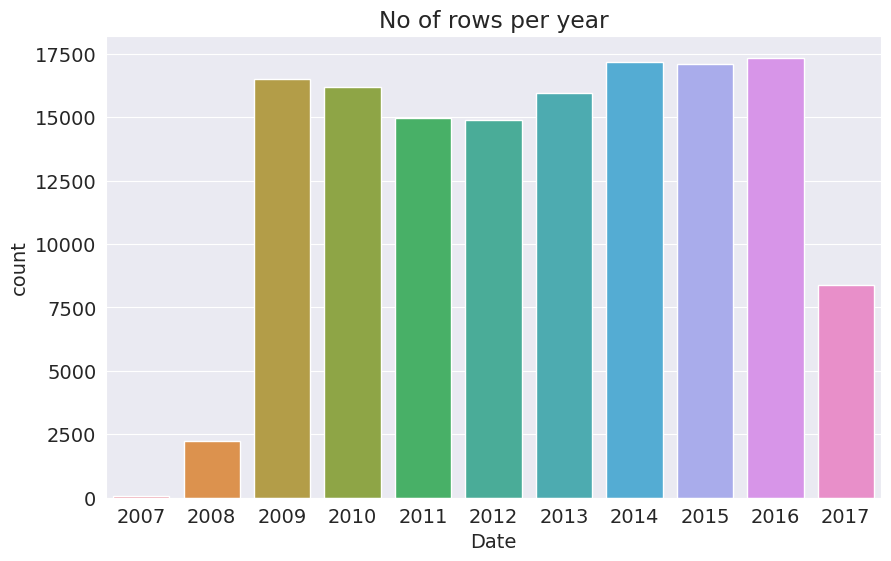

In [17]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year)
plt.title('No of rows per year')

While using datetime in datasets beware of not using future dates to make predictions of past here, what we can do is split the training data,validation data, test data such that the test set contains data from the last 2 years, the validation set consists of data from a year before that and the remaining dates are in training dataset(historic data)

<Axes: xlabel='Date', ylabel='count'>

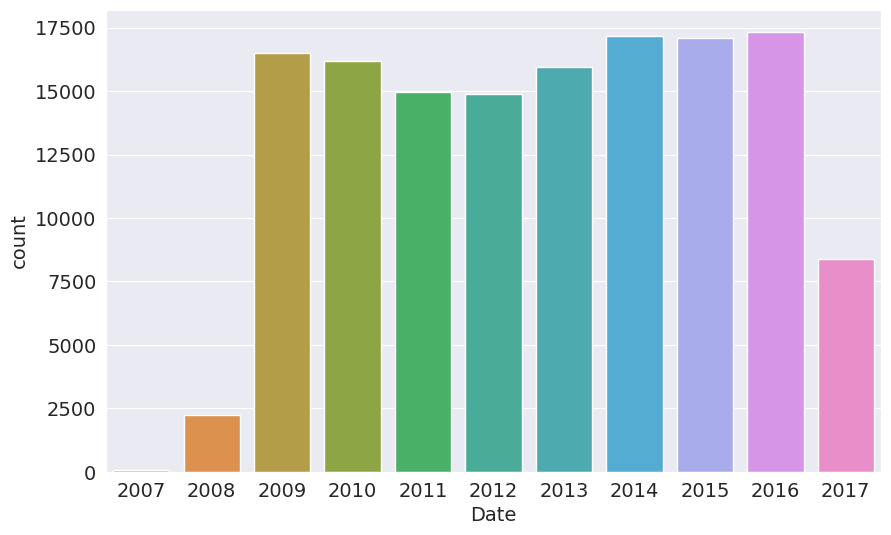

In [18]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

In [19]:
year = pd.to_datetime(df.Date).dt.year 

train_df = df[year<2015]
val_df = df[year==2015]
test_df=df[year>2015]

In [20]:
input_cols = list(train_df.columns)[1:-1]
# ignoring the date and target (RainTomorrow)
target_col = 'RainTomorrow'

In [21]:
# sometimes we have cols derived from target  col, so make sure to ignore them 

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [22]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy

In [23]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [24]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()


In [25]:
categoric_cols = train_inputs.select_dtypes('object').columns.tolist()

In [26]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [27]:
train_inputs[categoric_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [28]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer


In [30]:
imputer = SimpleImputer()

In [31]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [32]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [33]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [37]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [40]:
encoder.fit(df[categoric_cols])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [41]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [42]:
encoded_cols = encoder.get_feature_names_out(categoric_cols)

In [43]:
encoded_cols

array(['Location_Adelaide', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Richmond',
       'Location_Sale', 'Location_SalmonGums', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville',
       'Location_Tuggeranong', 

In [44]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoric_cols].fillna('Unknown'))

/tmp/ipykernel_33/828942557.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/828942557.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/828942557.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/828942557.py:1: PerformanceWarning:

DataFr

In [45]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoric_cols].fillna('Unknown'))

/tmp/ipykernel_33/355218304.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/355218304.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/355218304.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/355218304.py:1: PerformanceWarning:

DataFr

In [46]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoric_cols].fillna('Unknown'))

/tmp/ipykernel_33/4195334726.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/4195334726.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/4195334726.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipykernel_33/4195334726.py:1: PerformanceWarning:

Da

In [47]:
pd.set_option('display.max_columns',None)

In [48]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.350211  0.504798        No                0.0   
145455  0.492351  0.499917  0.364979  0.533589        No                0.0   
145456  0.492351  0.499917  0.381857  0.573896        No                0.0   
145457  0.492351  0.499917  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [49]:
from sklearn.linear_model import LogisticRegression


In [50]:
model = LogisticRegression(solver = 'liblinear')

In [51]:
train_inputs.shape

(97988, 123)

In [52]:
train_inputs[numeric_cols].shape

(97988, 16)

In [53]:
columns_to_drop=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
train_inputs2 = train_inputs.drop(columns=columns_to_drop)

# this is bcos i couldnt use train_inputs[encoded_cols + categoric_cols]

In [54]:
train_inputs2

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037741  0.526244       0.286822   
144549  0.556604  0.786389  0.000000     0.037741  0.526244       0.193798   
144550  0.608491  0.805293  0.000000     0.037741  0.526244       0.255814   
144551  0.674528  0.818526  0.000000     0.037741  0.526244       0.286822   
144552  0.731132  0.839319  0.000000     0.037741  0.526244       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0            0.4800  0.888889  0.499917  0.508439  0.522073   
1            0.4912  0.492351  0.499917  0.514768  0.570058   
2            0.5056  0.492351  0.222222  0.594937  0.548944   
3            0.5712  0.492351  0.499917  0.533755  0.612284   
4            0.4624  0.777778  0.888889  0.527426  0.673704   
...             ...       ...       ...       ...       ...   
144548       0.5232  0.492351  0.499917  0.651899  0.714012   
144549       0.4880  0.492351  0.499917  0.761603  0.771593   
144550       0.4944  0.492351  0.499917  0.778481  0.788868   
144551       0.5136  0.492351  0.499917  0.780591  0.817658   
144552       0.4656  0.492351  0.499917  0.786920  0.821497   

        Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
144548                0.0              0.0              0.0   
144549                0.0              0.0              0.0   
144550                0.0              0.0              0.0   
144551                0.0              0.0              0.0   
144552                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                0.0   
4                         0.0                     0.0                0.0   
...                       ...                     ...                ...   
144548                    0.0                     0.0                0.0   
144549                   

In [55]:
model.fit(train_inputs2,train_targets)

LogisticRegression(solver='liblinear')

In [56]:
train_inputs2.columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',

In [57]:
model.coef_.tolist()

[[0.8941494819914398,
  -2.8835981637598285,
  3.16705385571896,
  0.8748813625212737,
  -1.6712299421013947,
  6.767350229914935,
  -0.9348274497098934,
  -1.4305423144580125,
  0.32169035571609356,
  5.998310719348589,
  5.479442680901137,
  -9.193081641325355,
  -0.1617248603539462,
  1.2877526299030033,
  0.47427919277414954,
  2.0306485635715577,
  0.6006296229747108,
  -0.5482290695469623,
  0.47582713818585737,
  0.005403329094420832,
  0.3448876907966021,
  -0.3541939045192693,
  0.17792147945281966,
  0.4398188899108637,
  -0.01537127061274263,
  0.027474693408753546,
  0.25694232549913004,
  -0.0218819867279193,
  -0.044852542203540485,
  -0.4845267257789648,
  -0.13899063231311373,
  -0.5770420446571881,
  -0.7889757132822478,
  -0.25772682848771616,
  -0.33014715004120004,
  -0.5704349639635146,
  0.08010303171771241,
  0.010434612808275893,
  0.06303065657435758,
  -0.9041914913596089,
  -0.44254300410647857,
  0.0036144590326460013,
  -0.46233657140847095,
  -0.4666993679

In [58]:
model.intercept_

array([-2.51736667])

In [59]:
# making a features and weights dataset
n = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    'feature' : (['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Witchcliffe',
 'Location_Wollongong',
 'Location_Woomera',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindGustDir_nan',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir9am_nan',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 'WindDir3pm_NW',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW',
 'WindDir3pm_SW',
 'WindDir3pm_W',
 'WindDir3pm_WNW',
 'WindDir3pm_WSW',
 'WindDir3pm_nan',
 'RainToday_No',
 'RainToday_Yes']),
    'weights' : model.coef_.tolist()[0]
})



# this is again bcos i couldnt use [encoded_cols + categoric_cols]

In [60]:
pd.set_option('display.max_rows', None)

In [61]:
weight_df

feature   weights
0                      MinTemp  0.894149
1                      MaxTemp -2.883598
2                     Rainfall  3.167054
3                  Evaporation  0.874881
4                     Sunshine -1.671230
5                WindGustSpeed  6.767350
6                 WindSpeed9am -0.934827
7                 WindSpeed3pm -1.430542
8                  Humidity9am  0.321690
9                  Humidity3pm  5.998311
10                 Pressure9am  5.479443
11                 Pressure3pm -9.193082
12                    Cloud9am -0.161725
13                    Cloud3pm  1.287753
14                     Temp9am  0.474279
15                     Temp3pm  2.030649
16           Location_Adelaide  0.600630
17             Location_Albany -0.548229
18             Location_Albury  0.475827
19       Location_AliceSprings  0.005403
20      Location_BadgerysCreek  0.344888
21           Location_Ballarat -0.354194
22            Location_Bendigo  0.177921
23           Location_Brisbane  0.439819
24             Location_Cairns -0.015371
25           Location_Canberra  0.027475
26              Location_Cobar  0.256942
27       Location_CoffsHarbour -0.021882
28           Location_Dartmoor -0.044853
29             Location_Darwin -0.484527
30          Location_GoldCoast -0.138991
31             Location_Hobart -0.577042
32          Location_Katherine -0.788976
33         Location_Launceston -0.257727
34          Location_Melbourne -0.330147
35   Location_MelbourneAirport -0.570435
36            Location_Mildura  0.080103
37              Location_Moree  0.010435
38       Location_MountGambier  0.063031
39        Location_MountGinini -0.904191
40          Location_Newcastle -0.442543
41               Location_Nhil  0.003614
42          Location_NorahHead -0.462337
43      Location_NorfolkIsland -0.466699
44          Location_Nuriootpa -0.070649
45         Location_PearceRAAF  0.189933
46            Location_Penrith  0.448740
47              Location_Perth  0.606894
48       Location_PerthAirport  0.426065
49           Location_Portland -0.029343
50           Location_Richmond  0.248535
51               Location_Sale -0.322997
52         Location_SalmonGums  0.423491
53             Location_Sydney -0.057612
54      Location_SydneyAirport -0.114464
55         Location_Townsville -0.730251
56        Location_Tuggeranong  0.364068
57              Location_Uluru  0.181951
58         Location_WaggaWagga  0.182832
59            Location_Walpole  0.184513
60           Location_Watsonia -0.250316
61        Location_Williamtown  0.016776
62        Location_Witchcliffe  0.702321
63         Location_Wollongong -0.801548
64            Location_Woomera -0.194249
65               WindGustDir_E -0.253926
66             WindGustDir_ENE -0.251020
67             WindGustDir_ESE -0.154742
68               WindGustDir_N -0.315986
69              WindGustDir_NE -0.324420
70             WindGustDir_NNE -0.413325
71             WindGustDir_NNW -0.257846
72              WindGustDir_NW -0.251185
73               WindGustDir_S -0.203106
74              WindGustDir_SE -0.124617
75             WindGustDir_SSE -0.142799
76             WindGustDir_SSW -0.186460
77              WindGustDir_SW -0.183013
78               WindGustDir_W -0.315571
79             WindGustDir_WNW -0.350590
80             WindGustDir_WSW -0.292964
81             WindGustDir_nan  0.000000
82                WindDir9am_E -0.058595
83              WindDir9am_ENE  0.230845
84              WindDir9am_ESE -0.068135
85                WindDir9am_N  0.290290
86               WindDir9am_NE  0.239469
87              WindDir9am_NNE  0.404347
88              WindDir9am_NNW  0.198929
89               WindDir9am_NW  0.203703
90                WindDir9am_S -0.147834
91               WindDir9am_SE -0.047259
92              WindDir9am_SSE -0.144870
93              WindDir9am_SSW  0.065736
94               WindDir9am_SW  0.200496
95                WindDir9am_W  0.173817
96              WindDir9am_WNW  0.203626
97   

<Axes: xlabel='weights', ylabel='feature'>

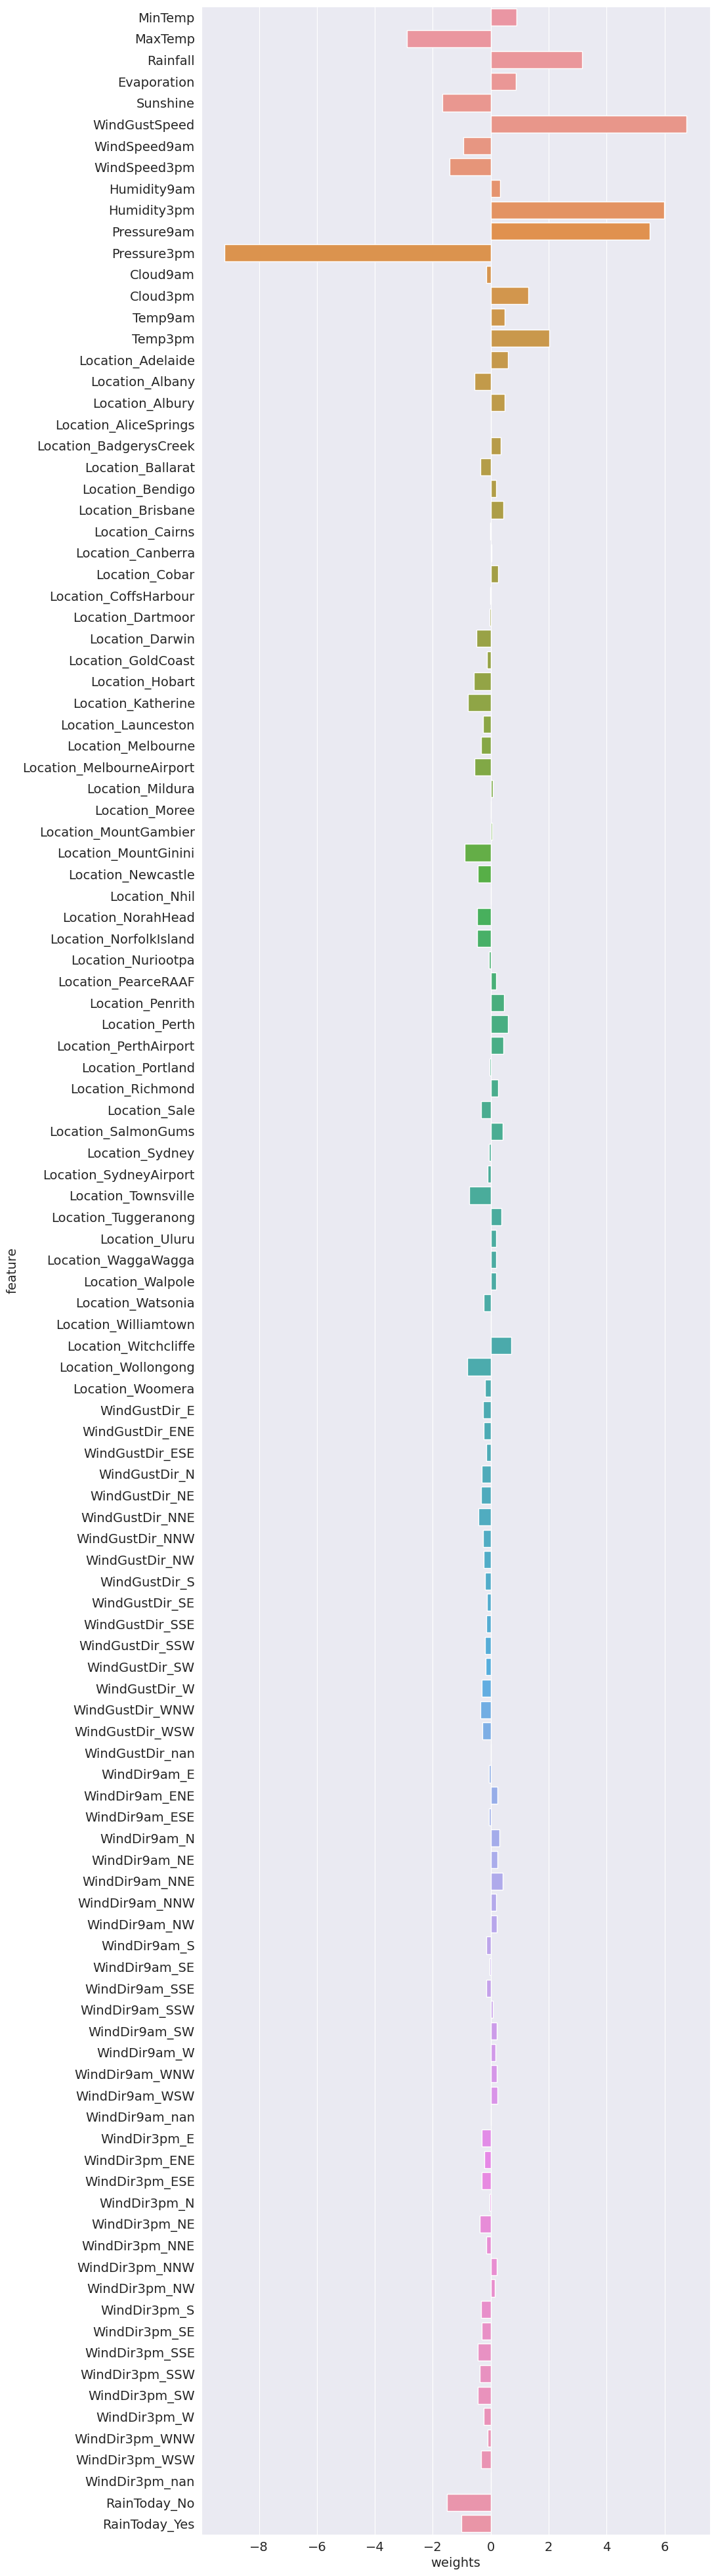

In [62]:
plt.figure(figsize=(10,50))
sns.barplot(data=weight_df,x='weights',y='feature')

<Axes: xlabel='weights', ylabel='feature'>

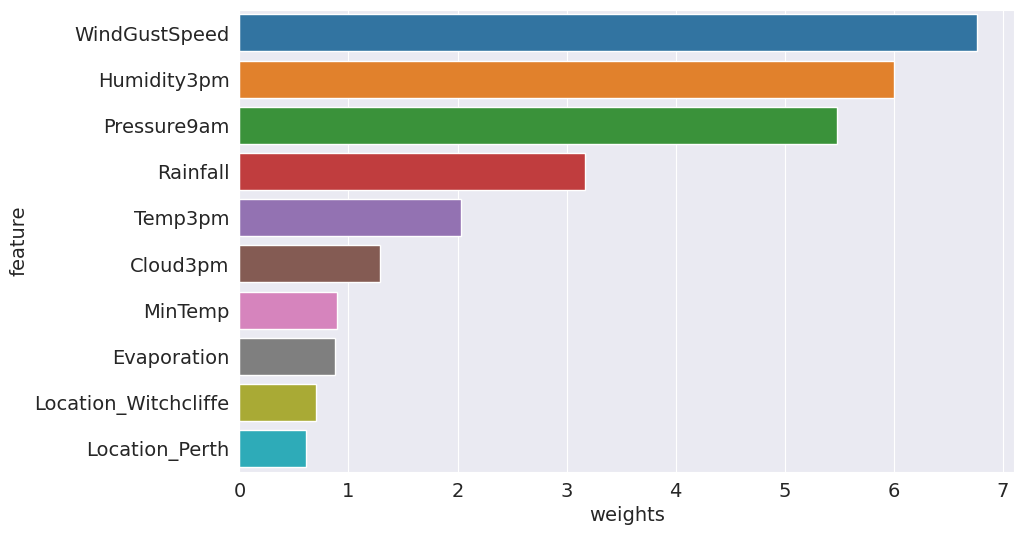

In [63]:
# plt.figure(figsize=(10,50))
sns.barplot(data=weight_df.sort_values('weights',ascending=False).head(10),x='weights',y='feature')

In [ ]:
X_train = train_inputs2

In [ ]:
X_train